In [6]:
import json
import numpy as np
import sys
import matplotlib.pyplot as plt
import random

from src.each_color import EachColor
from src.generic_algorithm import genetic_algorithm

In [7]:
def read_file():
    f = open('./config.json')
    return json.load(f)
     

def set_data_from_file(conf_file):
    return conf_file['colors_palette'], conf_file['selection_algorithm'], conf_file['mutation_rate'], conf_file['max_generations'], conf_file['expected_fitness'], conf_file['population_number']

Encontrado en la generacion numero: 0


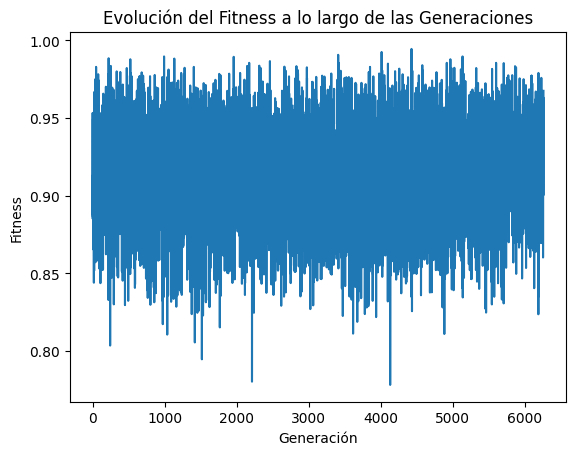

0.817362650632235
0.8732497897879488
0.8637572332075278
0.8943114821924332
0.9062917400364822
0.9083940818538719
0.9233536459384625
0.8771311363391388
0.861148409468026
0.9110918898136892
0.9218961085161326
0.8736345879906199
Encontrado en la generacion numero: 12
0.9179276488766418
0.9294844237424252
0.9101741043523688
0.9187121473932457
0.8949195215139273
0.9068403879602781
Encontrado en la generacion numero: 6
0.8551848721706263
0.8818963110088188
0.8977380014870173
0.8877946994307192
0.9046647389714257
0.8955310997408148
0.9115833381799433
0.9038882277403827
0.9466608999657434
0.9263552103476953
0.9447258182696315
0.9309536593660431
0.8631752773006063
0.9168417833800317
0.9401826865953069
0.9137849283773012
0.916197017386538
0.9108615575360403
0.8958997712833227
0.8724635781617789
0.8756382435420491
0.9176470588235294
0.8939241661246099
0.9240591500743643
0.948718835958345
0.9287611681388825
0.9438973497153597
0.9055018584474362
0.8780734764302116
0.9005075033564025
0.9154358484202

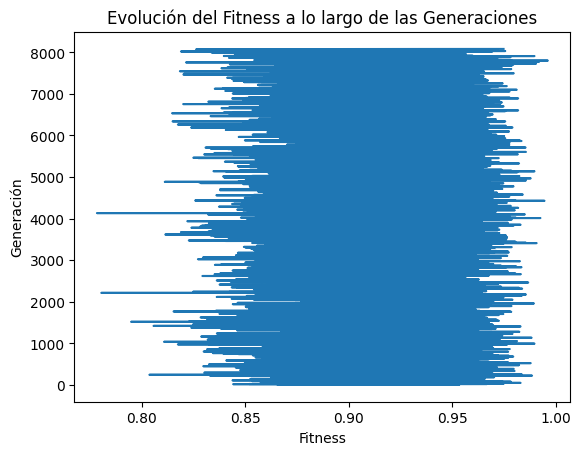

In [9]:
if __name__ == "__main__":
    colors_from_palette = []
    target_color : EachColor

    conf_file = read_file()
    colors_palette, selection_algorithm, mutation_rate, max_generations, expected_fitness, population_number = set_data_from_file(conf_file)

    with open(colors_palette, 'r') as file:
        first_line_is_target_color = file.readline()

        red, green, blue = first_line_is_target_color.split()
        target_color = EachColor(int(red), int(green), int(blue))

        n = population_number
        random_lines = random.sample(file.readlines(), n)

        for line in random_lines :
            red, green, blue = line.split()
            current_color = EachColor(int(red), int(green), int(blue))
            colors_from_palette.append(current_color)
    file.close()

    # TODO: Este grafico no anda bien
    # Run the genetic algorithm for one time and store the results
    result, fitness_by_generation = genetic_algorithm(colors_from_palette, target_color, selection_algorithm, mutation_rate, max_generations, expected_fitness, population_number)
    
    # Plot the evolution of fitness by generation
    plt.plot(range(len(fitness_by_generation)), fitness_by_generation)
    plt.title('Evolución del Fitness a lo largo de las Generaciones')
    plt.xlabel('Generación')
    plt.ylabel('Fitness')
    plt.show()

    # Run the genetic algorithm 200 times and store the results in a list
    all_results = []
    for i in range(200):
        result, _ = genetic_algorithm(colors_from_palette, target_color, selection_algorithm, mutation_rate, max_generations, expected_fitness, population_number)
        all_results.append(result.get_fitness(target_color))

    # Plot the average fitness over 200 runs
    average_fitness = sum(all_results) / len(all_results)
    plt.axvline(x=average_fitness, color='r', linestyle='-')
    plt.hist(all_results, bins=20)
    plt.title('Fitness Promedio en 200 Corridas')
    plt.xlabel('Fitness')
    plt.ylabel('Frecuencia')
    plt.show()


Graficos: Correr 200 veces cada metodo de seleccion, 100 con corte por generacion y 100 con corte por fitness cumplido